# Performance difference between Python and C
Python is a interpreted language and therefore slower for most applications. However, correct use of numeric libraries yields a significant speedup


In [1]:
import numpy as np
import time
N = 1000000
a = np.random.rand(N)
out1 = np.zeros(N)
out2 = np.zeros(N)
print a.dtype, out1.dtype, out2.dtype

float64 float64 float64


In [2]:
#slow elementwise exponential function
import math
for k in xrange(3):
    t0 = time.clock()
    
    for i in xrange(a.size): 
        out1[i] = math.exp(a[i])
    
    print time.clock() - t0

0.744857
0.411321
0.398875


In [3]:
#correct use of numeric libraries
for k in xrange(3):
    t0 = time.clock()
    
    out2 = np.exp(a)
    
    print time.clock() - t0

0.02135
0.019969
0.017721


In [4]:
# both ways of elementwise exponentiation have identical results.
print np.max(np.abs(out1-out2))

0.0


# Numeric solution of differential equations
Both ways use dopri5 solver with equal precissions. Due to the chaotic nature of the differential equation they die not agree on long term behaviour. The pure C-Module is significantly faster.

In [25]:
#This uses a numeric library for solving the ode, but since the function is defined on Python level, 
#it is way slower than the C-Module
from scipy.integrate import ode

y0 = [10.,1.,1.,0.]

def f(t, x, fargs):
    sigma, R, b = 10., 28., 8./3.
    
    return [sigma * ( x[1] - x[0] ),
            R * x[0] - x[1] - x[0] * x[2],
           -b * x[2] + x[0] * x[1],
           1.]
r = ode(f)
r.set_integrator('dopri5', atol=1E-12, rtol=1E-12, nsteps=100000000)
r.set_f_params(None)
r.set_initial_value(y0,0)
r.integrate(100.)


array([  6.04252857,  -1.50134487,  32.60628488, 100.        ])

In [26]:
# this uses dopri5 with equal precission, but the precission is defined in the C-code
%matplotlib notebook
import matplotlib as mpl
import matplotlib.pyplot as plt
import lorentz

pars= {'sigma' : 10.,
       'R' : 28.,
       'b' : 8./3.,
       'dt': 0.001,
       'numsteps' : 100000}

outarray = np.zeros((pars['numsteps']+ 1, 4))
outarray[0,:] = np.array([10.,1.,1.,0.])

lorentz.solve(outarray, pars)
print outarray[-1,:]
#plt.plot(outarray[:,1],outarray[:,2])
#plt.show()

[ -14.37071006  -17.55357795   31.45138625  100.        ]


<IPython.core.display.Javascript object>


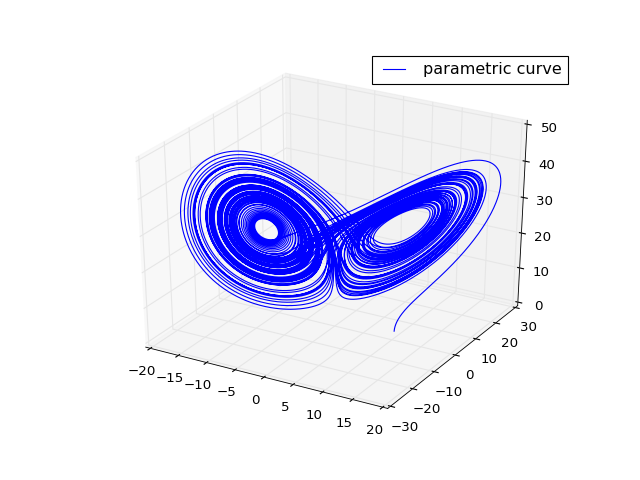

In [23]:
#The way I wrote it, the C-Module also outputs the full trajectory. It can be plottet using matplotlib
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(outarray[:,0],outarray[:,1],outarray[:,2], label='parametric curve')
ax.legend()

plt.show()